In [32]:
## Task 1 for one iteration (Just testing for one needle)
import random 
import time 
import math

needle_length = 0.7
space_btw_line = 1

d_btw_needle_line = random.uniform(0,space_btw_line/2)
angle_btw_needle_line = random.uniform(0,math.pi/2)

print(d_btw_needle_line,angle_btw_needle_line)

crossing_line = math.sin(angle_btw_needle_line) * (needle_length/2)
print(crossing_line)
if crossing_line > d_btw_needle_line:
    print("Line Crossed")
else:
    print("Not crossed")


0.31443031232655044 0.8118547556170518
0.2539476726191702
Not crossed


In [33]:
## Task 2 for n trials
import random 
import time 
import math

needle_length = 0.7
space_btw_line = 1
trials = 100
crossed_line_count = 0

for i in range(trials):
    d_btw_needle_line = random.uniform(0,space_btw_line/2)
    angle_btw_needle_line = random.uniform(0,math.pi/2)

    # print(d_btw_needle_line,angle_btw_needle_line)

    crossing_line = math.sin(angle_btw_needle_line) * (needle_length/2)
    # print(crossing_line)
    if crossing_line > d_btw_needle_line:
        crossed_line_count = crossed_line_count + 1
    else:
        continue

Probibility = crossed_line_count/trials
print(f"Probability of getting the needle crossed is {Probibility}")

Pi_estimate = (2*needle_length) / (space_btw_line*Probibility)
print(f"Pi estimated {Pi_estimate} vs Pi Actual 3.142")

Probability of getting the needle crossed is 0.41
Pi estimated 3.4146341463414633 vs Pi Actual 3.142


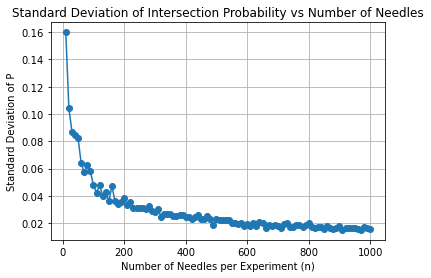

In [34]:
## Task 2 for n trials
import random 
import time 
import math
import numpy as np
import matplotlib.pyplot as plt

needle_length = 0.7
space_btw_line = 1
trials = 100

no_of_needles = list(range(10, 1001, 10))

std_deviations = []

for n in no_of_needles:
    Probibility = []
    
    for i in range(trials):
        crossed_line_count = 0
        for K in range(n):
            
            d_btw_needle_line = random.uniform(0,space_btw_line/2)
            angle_btw_needle_line = random.uniform(0,math.pi/2)
        
            # print(d_btw_needle_line,angle_btw_needle_line)
        
            crossing_line = math.sin(angle_btw_needle_line) * (needle_length/2)
            # print(crossing_line)
            if crossing_line > d_btw_needle_line:
                crossed_line_count = crossed_line_count + 1
            else:
                continue
        P = crossed_line_count/n
        Probibility.append(P)
        # print(f"Probability of getting the needle crossed with quantity{n} is {Probibility}")
    Std_Dev = np.std(Probibility)
    std_deviations.append(Std_Dev)

plt.plot(no_of_needles, std_deviations, marker='o')
plt.title("Standard Deviation of Intersection Probability vs Number of Needles")
plt.xlabel("Number of Needles per Experiment (n)")
plt.ylabel("Standard Deviation of P")
plt.grid(True)
plt.show()